# CODE For TIMESERIES CHAPTER

In [133]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import sklearn.linear_model

In [129]:
T = 1000
k = 1
timeseries = (2*np.arange(0,T) / T)**2 + np.random.rand(T) * np.sin((np.arange(0,T)/50) % (np.pi * 2)) + np.random.rand(T)

## Plots

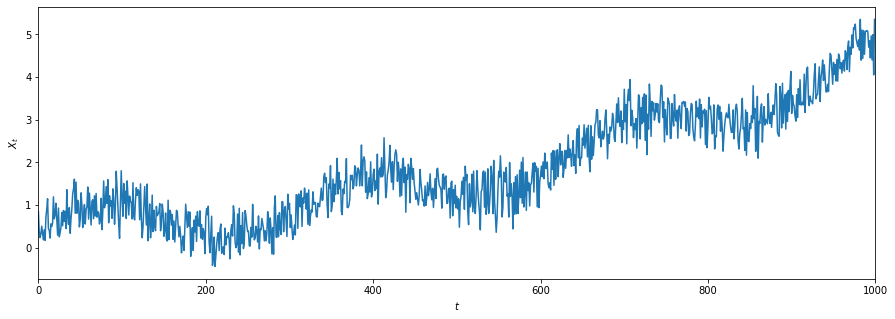

In [166]:
def timeplot(ts):
    plt.figure(figsize=(15,5))
    plt.plot(np.arange(0,len(ts)), ts)
    plt.xlim(0, len(ts))
    plt.ylabel(r'$X_t$')
    plt.xlabel(r'$t$')
    plt.show()

timeplot(timeseries)

In [144]:
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(np.arange(0,len(timeseries)), timeseries)
def func(x):
    return slope * x + intercept
lm_predict = func(np.arange(0,len(timeseries)))

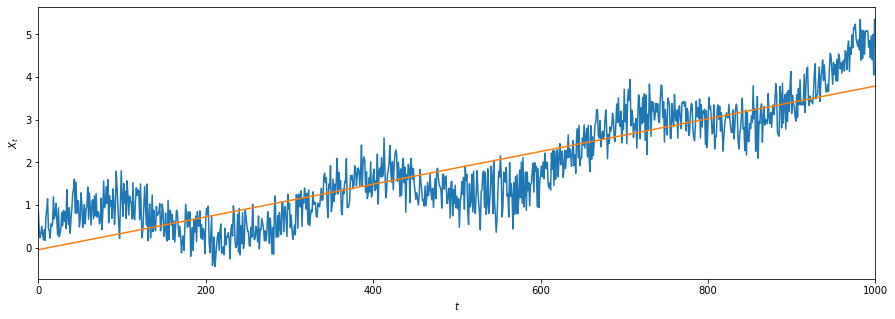

In [146]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(0,len(timeseries)), timeseries)
plt.plot(np.arange(0,len(timeseries)), lm_predict)
plt.xlim(0, len(timeseries))
plt.ylabel(r'$X_t$')
plt.xlabel(r'$t$')
plt.show()

# Moving Average

In [167]:
def moving_average(data, size):
    return np.convolve(data, np.ones(size)/size, mode='valid')

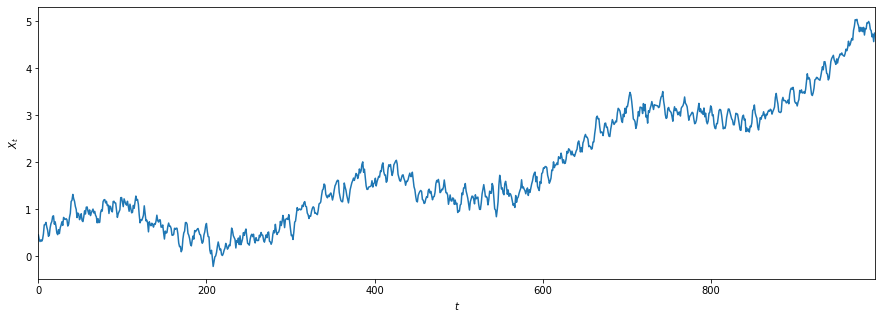

In [170]:
timeplot(moving_average(timeseries, 5))

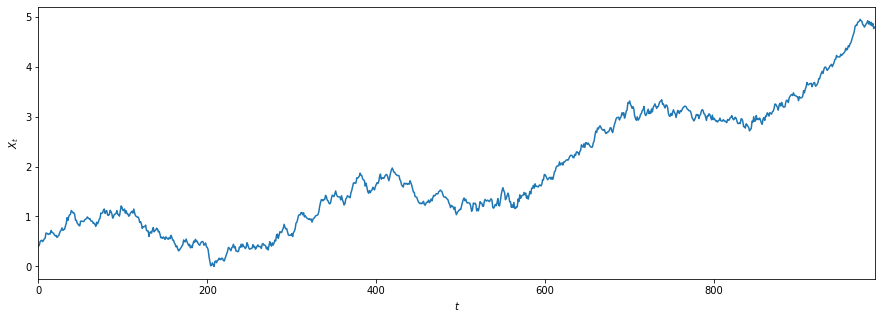

In [171]:
timeplot(moving_average(timeseries, 10))

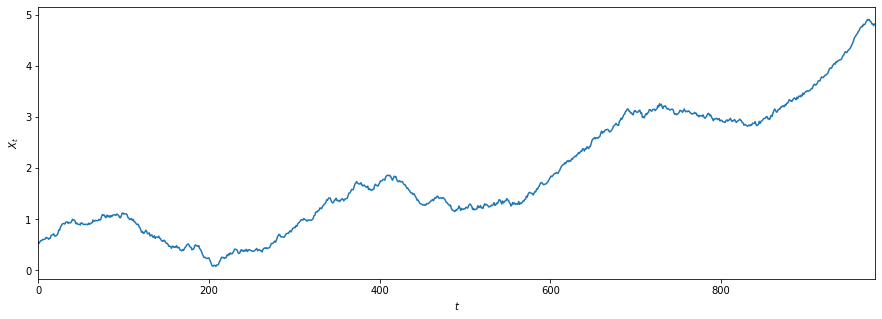

In [172]:
timeplot(moving_average(timeseries, 20))

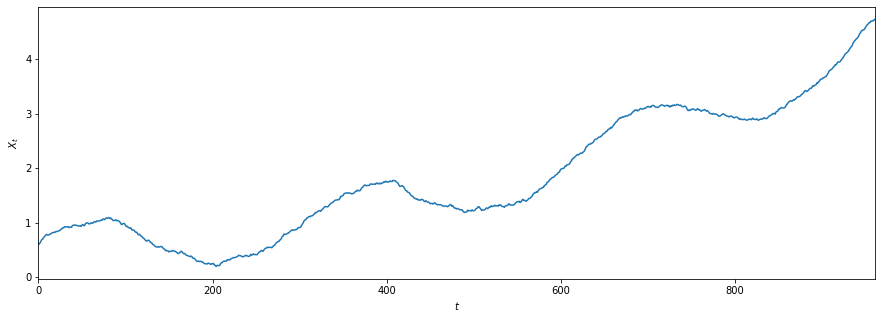

In [173]:
timeplot(moving_average(timeseries, 40))

# Exp. Smoothing

In [183]:
def exp_smt(ts, alpha):
    out = []
    out.append(ts[0])
    for i in range(len(ts)-1):
        out.append(alpha*ts[i+1]+(1-alpha)*out[i])
    return np.asarray(out)

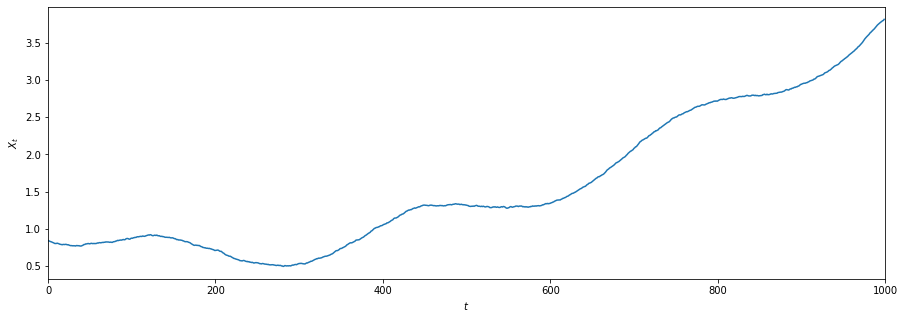

In [191]:
timeplot(exp_smt(timeseries, 0.01))

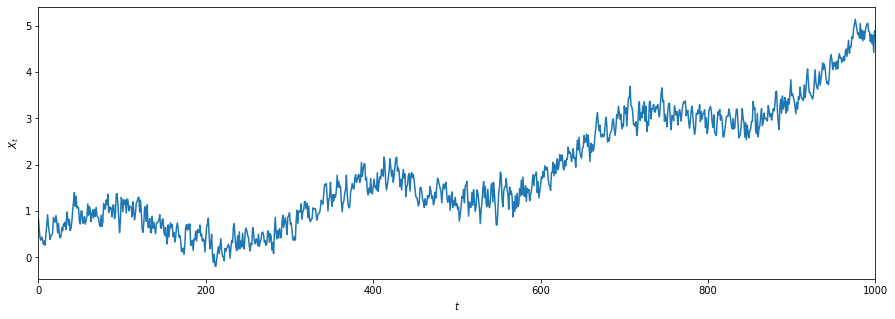

In [187]:
timeplot(exp_smt(timeseries, 0.5))

# Fourier

In [278]:
fourier_ts = np.fft.fft(timeseries, T)
freq = np.fft.fftfreq(T)

In [279]:
freq2 = (1/T) * np.arange(T)

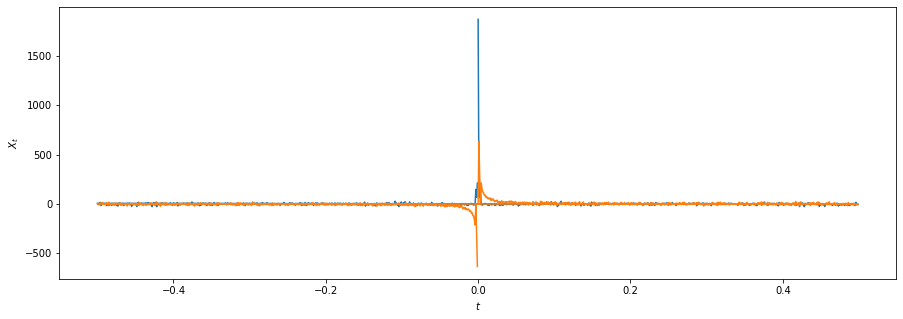

In [281]:
plt.figure(figsize=(15,5))
plt.plot(freq, fourier_ts.real)
plt.plot(freq, fourier_ts.imag)
plt.ylabel(r'$X_t$')
plt.xlabel(r'$t$')
plt.show()

In [283]:
psd = fourier_ts * np.conj(fourier_ts)/T

c:\Users\jakob\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


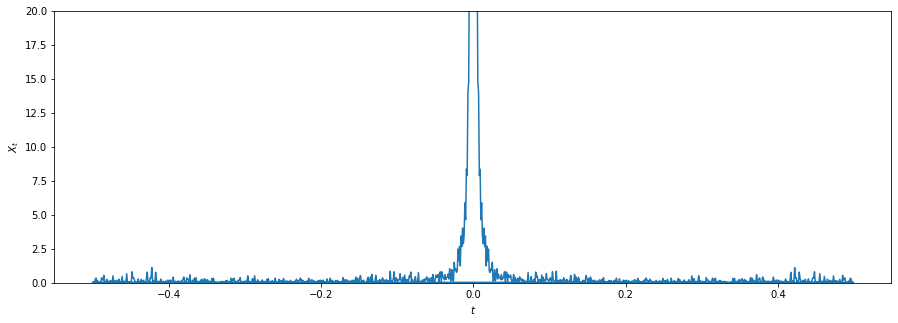

In [284]:
plt.figure(figsize=(15,5))
plt.plot(freq, psd)
plt.ylabel(r'$X_t$')
plt.xlabel(r'$t$')
plt.ylim(0,20)
plt.show()

In [251]:
psd_ids = psd > 10
psd_clean = psd * psd_ids
fourier_ts_clean = fourier_ts * psd_ids
ts_clean = np.fft.ifft(fourier_ts_clean)

c:\Users\jakob\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


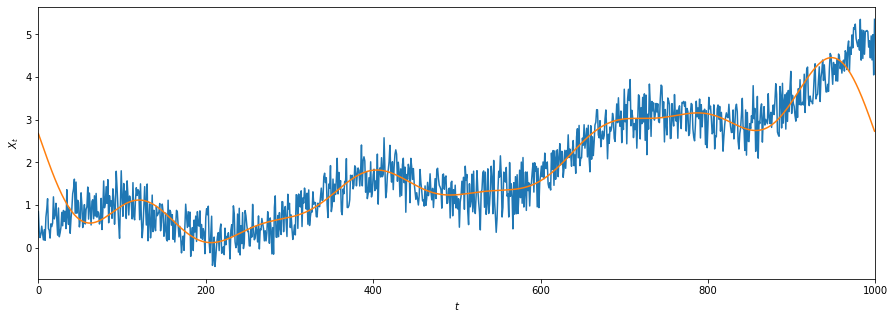

In [252]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(0,len(timeseries)), timeseries)
plt.plot(np.arange(0,len(timeseries)), ts_clean)
plt.xlim(0, len(timeseries))
plt.ylabel(r'$X_t$')
plt.xlabel(r'$t$')
plt.show()

In [259]:
timeseries_no_trend = timeseries - np.arange(T) * ((timeseries[T-1] - timeseries[0])/T)

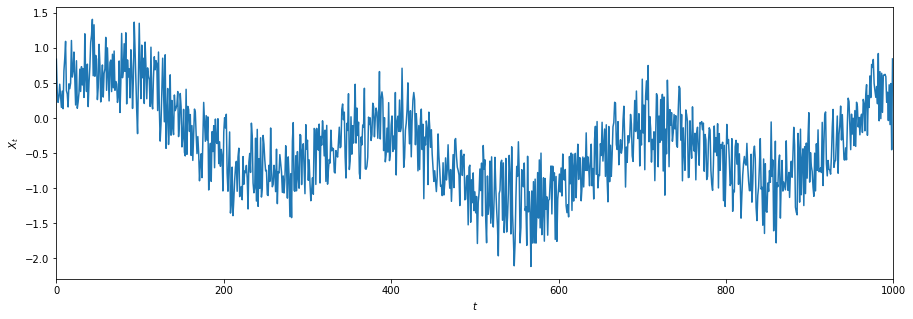

In [260]:
timeplot(timeseries_no_trend)

c:\Users\jakob\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


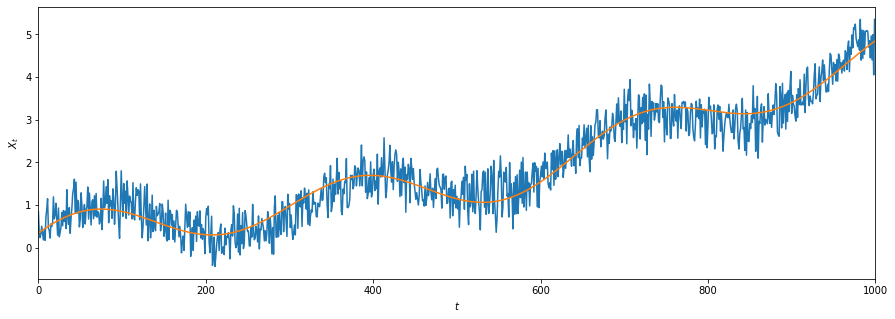

In [274]:
fourier_ts2 = np.fft.fft(timeseries_no_trend, T)
freq2 = np.fft.fftfreq(T)
psd2 = fourier_ts2 * np.conj(fourier_ts2)/T
psd_ids2 = psd2 > 10
psd_clean2 = psd2 * psd_ids2
fourier_ts_clean2 = fourier_ts2 * psd_ids2
ts_clean2 = np.fft.ifft(fourier_ts_clean2) + np.arange(T) * ((timeseries[T-1] - timeseries[0])/T)
plt.figure(figsize=(15,5))
plt.plot(np.arange(0,len(timeseries)), timeseries)
plt.plot(np.arange(0,len(timeseries)), ts_clean2)
plt.xlim(0, len(timeseries))
plt.ylabel(r'$X_t$')
plt.xlabel(r'$t$')
plt.show()

c:\Users\jakob\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


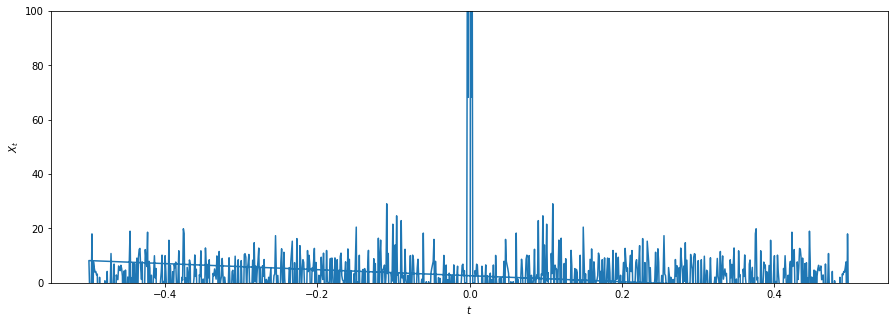

In [277]:
plt.figure(figsize=(15,5))
plt.plot(freq2, fourier_ts2)
plt.ylabel(r'$X_t$')
plt.xlabel(r'$t$')
plt.ylim(0,100)
plt.show()

In [266]:
fourier_ts2 = np.fft.rfft(timeseries_no_trend, T)


c:\Users\jakob\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


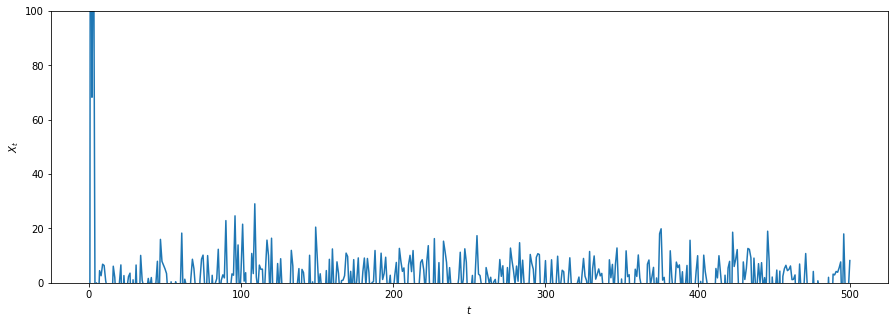

In [273]:
plt.figure(figsize=(15,5))
plt.plot(fourier_ts2)
plt.ylabel(r'$X_t$')
plt.xlabel(r'$t$')
plt.ylim(0,100)
plt.show()

In [271]:
fourier_ts2.shape

(501,)